In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
from sklearn.metrics import mean_squared_error 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [13]:
# Specify the file path of the CSV file
file_path = 'original_data.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# get except the first column
df = df.iloc[:, 1:]
df

,dist,delay_count,Total Time
0,25,5,361.152
1,19,4,348.368
2,27,6,361.096
3,37,7,380.200
4,35,8,378.624
...,...,...,...
715,21,5,349.912
716,19,4,347.896
717,31,6,371.592
718,35,8,381.832


In [3]:
# Split the data into train and test sets
train_x, test_x, train_y, test_y = train_test_split(df.drop('Total Time', axis=1), df['Total Time'], test_size=0.3, random_state=42)

In [4]:
# Define cross-validation strategy (e.g., KFold with 5 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

### Linear Regression

In [52]:
# Create an instance of the LinearRegression model
model_LR = LinearRegression()

# Perform cross-validation on the train data
mse_train_LR = -cross_val_score(model_LR, train_x, train_y, cv=kf, scoring='neg_mean_squared_error')

# Calculate average MSE
avg_mse_train_LR = np.mean(mse_train_LR)
avg_mse_train_LR

6.4818519682663664

In [53]:
# Fit the model to the train data
model_LR.fit(train_x, train_y)

# Predict on the test data
pred_test_LR = model_LR.predict(test_x)

# Calculate MSE on the test data
mean_squared_error(test_y, pred_test_LR)


7.014754939011608

### Regression Tree

In [14]:
# Create Decision Tree Regressor
model_RT = DecisionTreeRegressor()

# Perform cross-validation on the train data
mse_train_RT = -cross_val_score(model_RT, train_x, train_y, cv=kf, scoring='neg_mean_squared_error')

# Calculate average MSE
avg_mse_train_RT = np.mean(mse_train_RT)
avg_mse_train_RT


6.385286577363297

In [15]:
# Fit the model to the train data
model_RT.fit(train_x, train_y)

# Predict on the test data
pred_test_RT = model_RT.predict(test_x)

# Calculate MSE on the test data
mean_squared_error(test_y, pred_test_RT)

6.686541836236945

### GBM

In [56]:
# Create Gradient Boosting Regressor
model_GBM = GradientBoostingRegressor(n_estimators=100, max_depth=3)

# Perform cross-validation on the train data
mse_train_GBM = -cross_val_score(model_GBM, train_x, train_y, cv=kf, scoring='neg_mean_squared_error')

# Calculate average MSE
avg_mse_train_GBM = np.mean(mse_train_GBM)
avg_mse_train_GBM

6.353815585146701

In [57]:
# Fit the model to the train data
model_GBM.fit(train_x, train_y)

# Predict on the test data
pred_test_GBM = model_GBM.predict(test_x)

# Calculate MSE on the test data
mean_squared_error(test_y, pred_test_GBM)

7.960813248400477

c:\Users\purify\Anaconda3\envs\purify\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\purify\Anaconda3\envs\purify\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Users\purify\Anaconda3\envs\purify\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


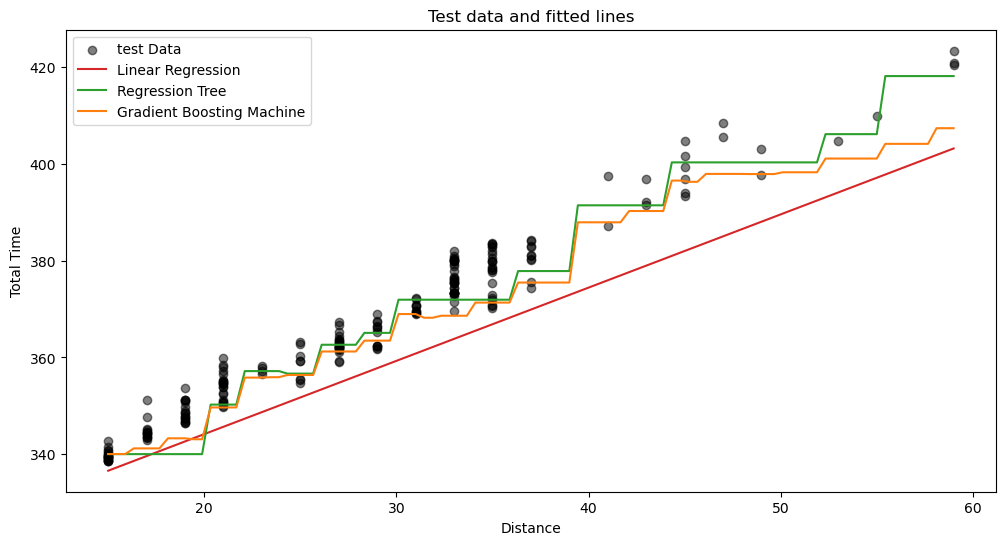

In [72]:
import matplotlib.pyplot as plt

# Generate data for plotting the fitted lines
x_range = np.linspace(min(test_x['dist']), max(test_x['dist']), 100).reshape(-1, 1)
linear_line = model_LR.predict(np.column_stack((x_range, np.zeros_like(x_range))))
tree_line = model_RT.predict(np.column_stack((x_range, np.zeros_like(x_range))))
gbm_line = model_GBM.predict(np.column_stack((x_range, np.zeros_like(x_range))))

# Plotting the data and fitted lines
plt.figure(figsize=(12, 6))

# Scatter plot of the actual data
plt.scatter(test_x['dist'], test_y, color='black', label='test Data', alpha = 0.5)

# Linear Regression
plt.plot(x_range, linear_line, color='C3', label='Linear Regression')

# Regression Tree
plt.plot(x_range, tree_line, color='C2', label='Regression Tree')

# GBM
plt.plot(x_range, gbm_line, color='C1', label='Gradient Boosting Machine')

# Customize the plot
plt.xlabel('Distance')
plt.ylabel('Total Time')
plt.title('Test data and fitted lines')
plt.legend()
plt.show()